In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")

# Fix the path construction - use forward slashes or raw strings
import os

# Method 1: Use forward slashes (recommended)
path = os.path.abspath(os.path.join("..", "04_S&P500_quant_analysis", "01_data", "^spx_d.csv"))

# Alternative Method 2: Use raw string
# path = os.path.abspath(os.path.join("..", r"04_S&P500_quant_analysis\01_data", "^spx_d.csv"))

# Alternative Method 3: Use pathlib (modern approach)
# from pathlib import Path
# path = Path("..") / "04_S&P500_quant_analysis" / "01_data" / "^spx_d.csv"

# print(f"Path exists: {os.path.exists(path)}")

# Read the CSV file
df = pd.read_csv(path)

# lower case column names for easier access
df.columns = [col.lower() for col in df.columns]

# Set the 'date' column as the index and convert it to datetime
df['date'] = pd.to_datetime(df['date'])
df.set_index('date', inplace=True)

# Show the first few rows of the dataframe
df.head()

,open,high,low,close,volume
date,,,,,
1789-05-01,0.51,0.51,0.51,0.51,0.0
1789-06-01,0.51,0.51,0.51,0.51,0.0
1789-07-01,0.50,0.50,0.50,0.50,0.0
1789-08-01,0.50,0.51,0.50,0.51,0.0
1789-09-01,0.51,0.51,0.50,0.51,0.0


In [2]:
# Calculate simple returns with pct_change()
df['simple_returns'] = df['close'].pct_change()

# Drop NA values that result from pct_change()
df.dropna(inplace=True)

# Show dataframe
df.head()

,open,high,low,close,volume,simple_returns
date,,,,,,
1789-06-01,0.51,0.51,0.51,0.51,0.0,0.000000
1789-07-01,0.50,0.50,0.50,0.50,0.0,-0.019608
1789-08-01,0.50,0.51,0.50,0.51,0.0,0.020000
1789-09-01,0.51,0.51,0.50,0.51,0.0,0.000000
1789-10-01,0.51,0.51,0.51,0.51,0.0,0.000000


In [3]:
# resample to monthly frequency, taking the last observation of each month for OHLCV
monthly_ohlcv = df.resample('M').agg({
    'open': 'last',
    'high': 'last',
    'low': 'last',
    'close': 'last',
    'volume': 'last'
})

# simple_returns for monthly data
monthly_ohlcv['monthly_returns'] = monthly_ohlcv['close'].pct_change()

# Drop NA values that result from pct_change()
monthly_ohlcv.dropna(inplace=True)

# Show dataframe
monthly_ohlcv.head()

,open,high,low,close,volume,monthly_returns
date,,,,,,
1789-07-31,0.50,0.50,0.50,0.50,0.0,-0.019608
1789-08-31,0.50,0.51,0.50,0.51,0.0,0.020000
1789-09-30,0.51,0.51,0.50,0.51,0.0,0.000000
1789-10-31,0.51,0.51,0.51,0.51,0.0,0.000000
1789-11-30,0.51,0.51,0.50,0.50,0.0,-0.019608


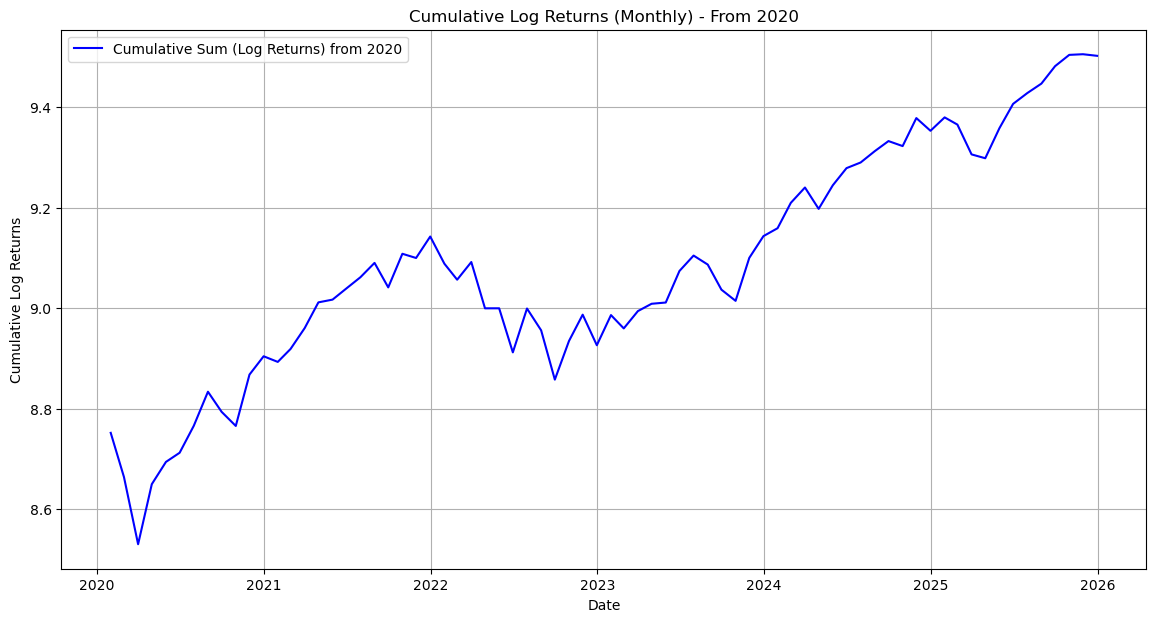

In [4]:
# Calculate log returns (Monthly) for all data
log_returns = (1 + monthly_ohlcv['monthly_returns']).apply(np.log)

# Cumulative sum of log returns (correct for compounding)
cumsum_log = log_returns.cumsum()

# Filter cumulative log returns from 2020 onwards
cumsum_log_2020 = cumsum_log[cumsum_log.index >= '2020-01-01']

# Plot cumulative log returns from 2020
plt.figure(figsize=(14, 7))
plt.plot(cumsum_log_2020, label='Cumulative Sum (Log Returns) from 2020', color='blue')
plt.title('Cumulative Log Returns (Monthly) - From 2020')
plt.xlabel('Date')
plt.ylabel('Cumulative Log Returns')
plt.legend()
plt.grid()
plt.show()

In [5]:
# add year column from DatetimeIndex
monthly_ohlcv['year'] = monthly_ohlcv.index.year

# add month column from DatetimeIndex
monthly_ohlcv['month'] = monthly_ohlcv.index.month

# add day column from DatetimeIndex
monthly_ohlcv['day'] = monthly_ohlcv.index.day

monthly_ohlcv.head()

,open,high,low,close,volume,monthly_returns,year,month,day
date,,,,,,,,,
1789-07-31,0.50,0.50,0.50,0.50,0.0,-0.019608,1789,7,31
1789-08-31,0.50,0.51,0.50,0.51,0.0,0.020000,1789,8,31
1789-09-30,0.51,0.51,0.50,0.51,0.0,0.000000,1789,9,30
1789-10-31,0.51,0.51,0.51,0.51,0.0,0.000000,1789,10,31
1789-11-30,0.51,0.51,0.50,0.50,0.0,-0.019608,1789,11,30


In [6]:
# Select month for the analysis
# M = 1 # January
# M = 2 # February
# M = 3 # March
# M = 4 # April
# M = 5 # May
# M = 6 # June
# M = 7 # July
# M = 8 # August
M = 9  # September
# M = 10 # October
# M = 11 # November
# M = 12 # December

In [7]:
df_ = monthly_ohlcv.copy()

# select only rows where month == M
df_ = df_[df_.month == M]

# count positive months (where monthly_returns > 0)
positive_months = len(df_[df_['monthly_returns'] > 0])
print(f"Number of positive months in month {M}: {positive_months}")

# count months (length of df)
months_count = len(df_)
print(f"Number of months in the dataset for month {M}: {months_count}")

# percentage of positive months
positive_percentage = (positive_months / months_count) * 100
print(f"Percentage of positive months in month {M}: {positive_percentage:.2f}%")

Number of positive months in month 9: 109
Number of months in the dataset for month 9: 236
Percentage of positive months in month 9: 46.19%


In [8]:
# def get_positive_months(monthly_ohlcv, M):
#     df_ = monthly_ohlcv.copy()
#     df_ = df_[df_.month == M]
#     positive_months = df_[df_['monthly_returns'] > 0]['year'].tolist()
#     return positive_months

# function that return monthly_ohlcv.year where month == M and monthly_returns > 0
def get_positive_years(monthly_ohlcv, M):
    df_ = monthly_ohlcv.copy()
    df_ = df_[df_.month == M]
    positive_years = df_[df_['monthly_returns'] > 0]['year'].tolist()
    return positive_years

# Example usage
positive_years = get_positive_years(monthly_ohlcv, M)
print(f"Years with positive returns in month {M}: {positive_years}")

print(f"Number of years with positive returns in month {M}: {len(positive_years)}")

Years with positive returns in month 9: [1790, 1791, 1794, 1798, 1800, 1802, 1804, 1807, 1808, 1809, 1814, 1815, 1817, 1820, 1822, 1823, 1827, 1829, 1830, 1832, 1834, 1838, 1840, 1842, 1843, 1845, 1850, 1852, 1856, 1860, 1861, 1862, 1863, 1865, 1866, 1867, 1868, 1874, 1877, 1878, 1879, 1880, 1882, 1885, 1886, 1887, 1888, 1889, 1891, 1893, 1896, 1904, 1905, 1906, 1909, 1910, 1912, 1915, 1916, 1918, 1919, 1920, 1921, 1925, 1927, 1928, 1935, 1936, 1938, 1939, 1940, 1942, 1943, 1945, 1949, 1950, 1953, 1954, 1955, 1958, 1964, 1965, 1967, 1968, 1970, 1973, 1976, 1980, 1982, 1983, 1988, 1992, 1995, 1996, 1997, 1998, 2004, 2005, 2006, 2007, 2009, 2010, 2012, 2013, 2017, 2018, 2019, 2024, 2025]
Number of years with positive returns in month 9: 109


In [9]:
# function that for every year in positive_years, calculate the End Of Year Cumulative Sum (Log Returns)
def eoy_cumsum_log(positive_years, df=monthly_ohlcv):
    eoy_returns = {}
    for year in positive_years:
        # Filter data for the specific year
        df_year = df[df['year'] == year]
        if not df_year.empty:
            # Calculate log returns for the year
            log_returns_year = (1 + df_year['monthly_returns']).apply(np.log)
            # Cumulative sum of log returns for the year
            cumsum_log_year = log_returns_year.cumsum()
            # Get the End Of Year cumulative return (last value of the year)
            eoy_return = cumsum_log_year.iloc[-1]
            eoy_returns[year] = eoy_return
    return eoy_returns

# Example usage
eoy_returns = eoy_cumsum_log(positive_years)

print("End Of Year Cumulative Sum (Log Returns) for years with positive returns in month", M)
for year, ret in eoy_returns.items():
    print(f"{year}: {ret:.4f}")

End Of Year Cumulative Sum (Log Returns) for years with positive returns in month 9
1790: 0.1310
1791: 0.1001
1794: 0.2036
1798: 0.1737
1800: 0.2357
1802: 0.0313
1804: 0.3920
1807: -0.6131
1808: 0.3254
1809: 0.2793
1814: 0.5086
1815: 0.0526
1817: 0.1252
1820: 0.0979
1822: -0.0440
1823: 0.0583
1827: 0.0297
1829: 0.1001
1830: 0.1377
1832: 0.2260
1834: 0.1186
1838: -0.0273
1840: 0.0471
1842: -0.1442
1843: 0.4112
1845: 0.0319
1850: 0.1760
1852: 0.2336
1856: 0.0776
1860: 0.3084
1861: 0.0188
1862: 0.4101
1863: 0.3396
1865: 0.0489
1866: 0.0379
1867: 0.0323
1868: 0.0988
1874: 0.0390
1877: -0.1054
1878: 0.0999
1879: 0.2719
1880: 0.1967
1882: -0.0113
1885: 0.1809
1886: 0.0445
1887: -0.0891
1888: 0.0482
1889: 0.0598
1891: 0.1629
1893: -0.2823
1896: -0.0047
1904: 0.2203
1905: 0.1814
1906: -0.0237
1909: 0.1000
1910: -0.1535
1912: 0.0224
1915: 0.3593
1916: -0.0342
1918: 0.0773
1919: 0.0921
1920: -0.2105
1921: 0.0485
1925: 0.2085
1927: 0.2091
1928: 0.3190
1935: 0.3462
1936: 0.2463
1938: 0.2248
1939: 

In [10]:
# count how many of the eoy_returns are positive
positive_eoy_count = sum(1 for ret in eoy_returns.values() if ret > 0)
print(f"Number of years with positive End Of Year returns: {positive_eoy_count} out of {len(eoy_returns)}")

# calculate the percentage of positive eoy_returns
positive_eoy_percentage = (positive_eoy_count / len(eoy_returns)) * 100
print(f"Percentage of years with positive End Of Year returns: {positive_eoy_percentage:.2f}%")

Number of years with positive End Of Year returns: 91 out of 109
Percentage of years with positive End Of Year returns: 83.49%


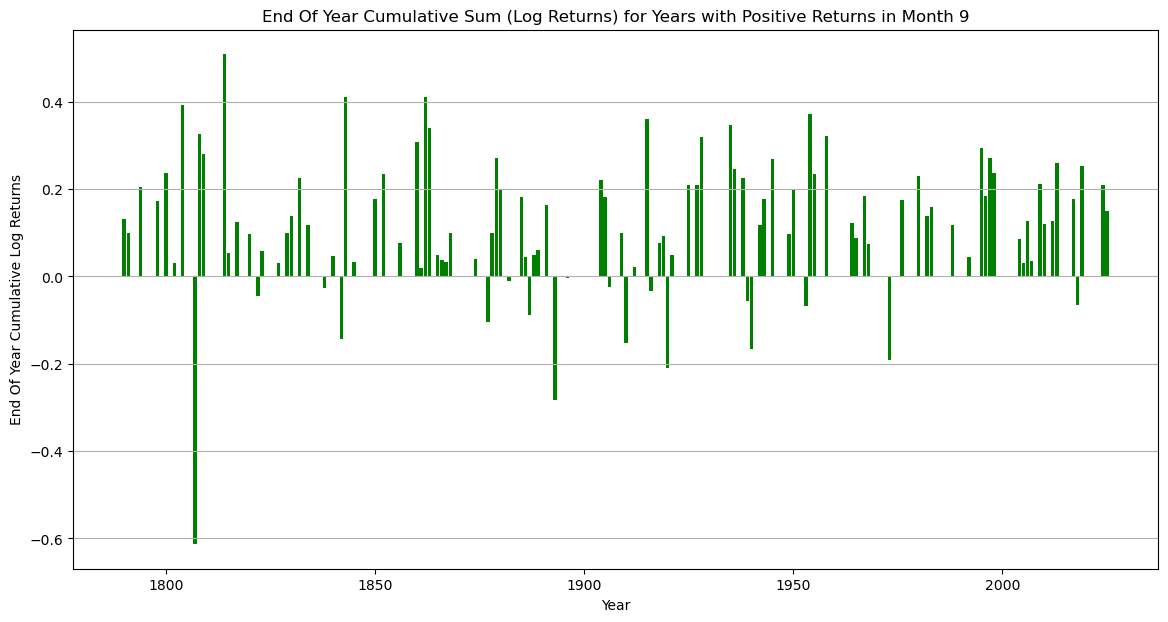

In [11]:
# Plotting the End Of Year Cumulative Sum (Log Returns) for years with positive returns in month M
years = list(eoy_returns.keys())
returns = list(eoy_returns.values())
plt.figure(figsize=(14, 7))
plt.bar(years, returns, color='green')
plt.title(f'End Of Year Cumulative Sum (Log Returns) for Years with Positive Returns in Month {M}')
plt.xlabel('Year')
plt.ylabel('End Of Year Cumulative Log Returns')
plt.grid(axis='y')
plt.show()

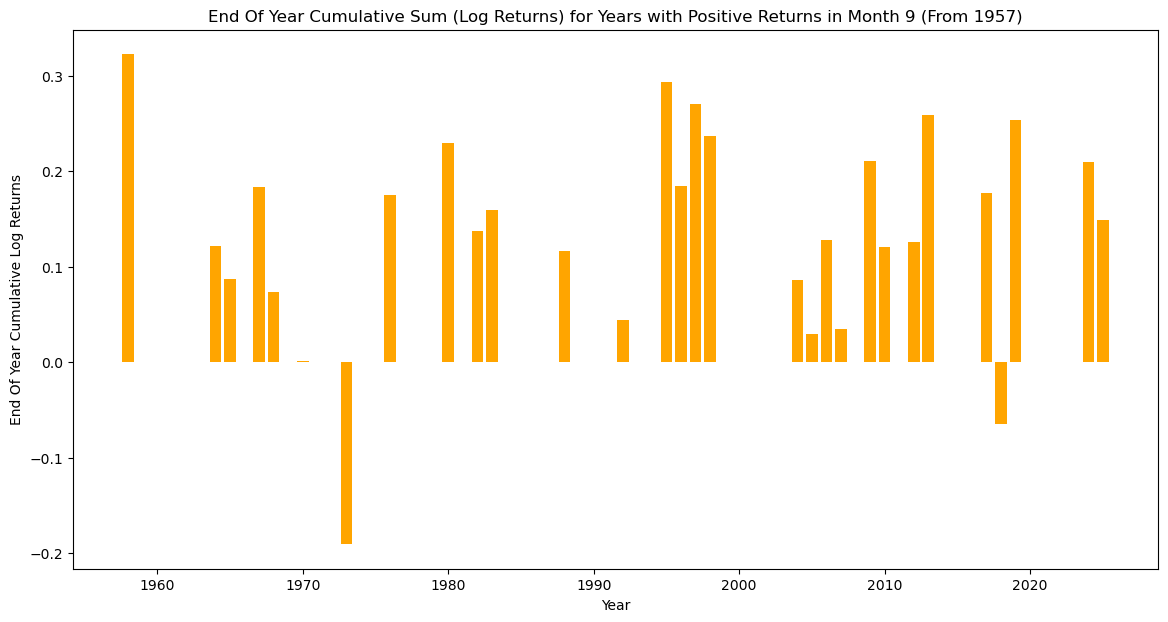

In [12]:
# plot of the years > 1957
years = list(eoy_returns.keys())
years = [year for year in years if year >= 1957]
returns = [eoy_returns[year] for year in years]

plt.figure(figsize=(14, 7))
plt.bar(years, returns, color='orange')
plt.title(f'End Of Year Cumulative Sum (Log Returns) for Years with Positive Returns in Month {M} (From 1957)')
plt.xlabel('Year')
plt.ylabel('End Of Year Cumulative Log Returns')
plt.show()

## Analysis Summary

This analysis examined the relationship between positive September returns and end-of-year performance for the S&P 500 index.

### Key Findings:

1. **Historical Pattern**: We identified all years where September showed positive monthly returns
2. **End-of-Year Performance**: For each of these years, we calculated the cumulative log returns through the end of the year
3. **Notable Exceptions**: Out of all years with positive September returns, only **two cases** resulted in negative year-end performance:
   - **1973**: Despite a positive September, the year closed with negative returns
   - **2018**: Despite a positive September, the year closed with negative returns

### Conclusion:

The analysis reveals that positive September performance is generally a strong indicator of positive year-end returns, with only 2 exceptions (1973 and 2018) in the entire historical dataset since 1957. This suggests a strong seasonal pattern where positive September momentum tends to carry through to year-end.